**IMPORT LIBRARIES**

In [200]:

import numpy as np
import pandas as pd

import plotly as pl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

**LOAD DATA**

In [201]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


Anaemia -> 0 = No, 1 = Yes
Diabetes -> 0 = No, 1 = Yes
High_blood_pressure -> 0 = No, 1 = Yes
Sex -> Male = 1, Female =0
Smoking -> 0 = No, 1 = Yes
DEATH_EVENT -> 0 = No, 1 = Yes


**NULL VALUES CHECK**

In [202]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

**DATA EXPLORATION**

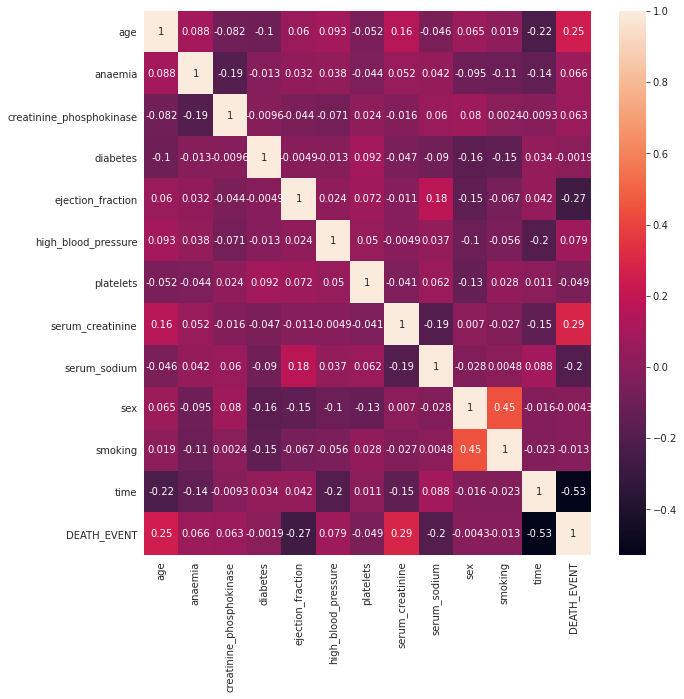

In [203]:
# CORRELATION HEATMAP
sns.set_style("darkgrid")
sns.set_palette("CMRmap")
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),ax=ax,annot=True)
plt.show()

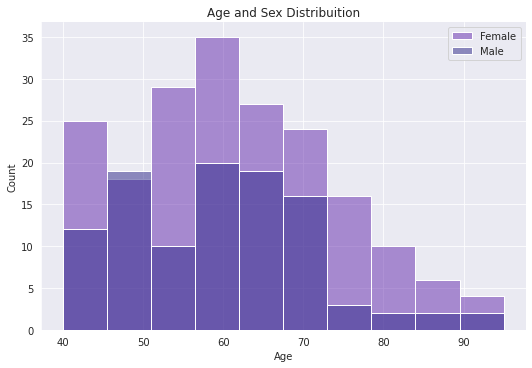

In [204]:
# AGE DISTRIBUITION

sns.displot(data=df, x='age', hue='sex', aspect=1.5, legend=False)
plt.title("Age and Sex Distribuition")
plt.xlabel("Age")
plt.legend(loc="upper right",labels=["Female", "Male"])
plt.show()


**DATA TRAINNING SPLIT**

In [205]:
# TRAIN TEST SPLIT
X_train, X_test, Y_train, Y_test = train_test_split(df.loc[:,{'serum_creatinine','time','age','ejection_fraction','serum_sodium'}],df.loc[:,{'DEATH_EVENT'}],test_size=0.3)

In [206]:
algorithm = []
accuracy = []

**MODELS**

In [207]:
#SVC
svm = SVC()
svm.fit(X_train, Y_train)
algorithm.append("SVC")
accuracy.append(svm.score(X_test,Y_test))

cm = confusion_matrix(Y_test, svm.predict(X_test))
cr = classification_report(Y_test, svm.predict(X_test))

print ("Acucuracy: ", svm.score(X_test, Y_test))
print (cr)

Acucuracy:  0.9
              precision    recall  f1-score   support

           0       0.88      1.00      0.94        68
           1       1.00      0.59      0.74        22

    accuracy                           0.90        90
   macro avg       0.94      0.80      0.84        90
weighted avg       0.91      0.90      0.89        90

/home/jpbogoni/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [208]:
#RANDOM FOREST
param_grid = {'n_estimators': np.arange(10, 100, 10)}
rf = RandomForestClassifier(random_state = 42)
rf_gscv = GridSearchCV(rf, param_grid, cv=4)
rf_gscv.fit(X_train, Y_train)
print("Best K Value is ",rf_gscv.best_params_)

accuracy.append(rf_gscv.score(X_test,Y_test))
algorithm.append("RandomForestClassifier")

cm = confusion_matrix(Y_test, rf_gscv.predict(X_test))
cr = classification_report(Y_test, rf_gscv.predict(X_test))

print ("Acucuracy: ", rf_gscv.score(X_test,Y_test))
print (cr)

/home/jpbogoni/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/home/jpbogoni/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/home/jpbogoni/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/home/jpbogoni/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example 

In [209]:
# RandomForestClassifier
param_grid = {'n_estimators': np.arange(10, 100, 10)}
rf = RandomForestClassifier(random_state = 42)
rf_gscv = GridSearchCV(rf, param_grid, cv=4)
rf_gscv.fit(X_train, Y_train)
print("Best K Value is ",rf_gscv.best_params_)

accuracy.append(rf_gscv.score(X_test,Y_test))
algorithm.append("RandomForestClassifier")

cm = confusion_matrix(Y_test, rf_gscv.predict(X_test))
predict.append(cm.item(0)+cm.item(2))

cr = classification_report(Y_test, rf_gscv.predict(X_test))

print ("Acucuracy: ", rf_gscv.score(X_test,Y_test))
print (cr)
print ("Predict: ", cm.item(0)+cm.item(2))

/home/jpbogoni/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/home/jpbogoni/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/home/jpbogoni/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/home/jpbogoni/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example 

In [210]:
# DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)
accuracy.append(dt.score(X_test, Y_test))
algorithm.append("DecisionTreeClassifier")

cm = confusion_matrix(Y_test, dt.predict(X_test))
cr = classification_report(Y_test, dt.predict(X_test))

print ("Accuracy: ", dt.score(X_test,Y_test))
print (cr)

Accuracy:  0.8777777777777778
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        68
           1       0.76      0.73      0.74        22

    accuracy                           0.88        90
   macro avg       0.84      0.83      0.83        90
weighted avg       0.88      0.88      0.88        90



In [211]:
# KNeighborsClassifier
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1, 25)}
knn_gscv = GridSearchCV(knn, param_grid, cv=4)
knn_gscv.fit(X_train, Y_train)
print("Best K Value is ",knn_gscv.best_params_)

accuracy.append(knn_gscv.score(X_test,Y_test))
algorithm.append("KNeighborsClassifier")

cm = confusion_matrix(Y_test, knn_gscv.predict(X_test))
cr = classification_report(Y_test, knn_gscv.predict(X_test))

print ("Accuracy: ", knn_gscv.score(X_test,Y_test))
print (cr)

/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/home/jpbogoni/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/home/jpbogoni/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/home/jpbogoni/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/hom

In [212]:
# LogisticRegression
lg = LogisticRegression()
lg.fit(X_train, Y_train)
accuracy.append(lg.score(X_test, Y_test))
algorithm.append("LogisticRegression")

print("test accuracy ",lg.score(X_test,Y_test))

cm = confusion_matrix(Y_test, lg.predict(X_test))
cr = classification_report(Y_test, lg.predict(X_test))

print ("Accuracy: ", lg.score(X_test,Y_test))
print (cr)

/home/jpbogoni/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

test accuracy  0.9
Accuracy:  0.9
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        68
           1       0.84      0.73      0.78        22

    accuracy                           0.90        90
   macro avg       0.88      0.84      0.86        90
weighted avg       0.90      0.90      0.90        90



**ACCURACY**

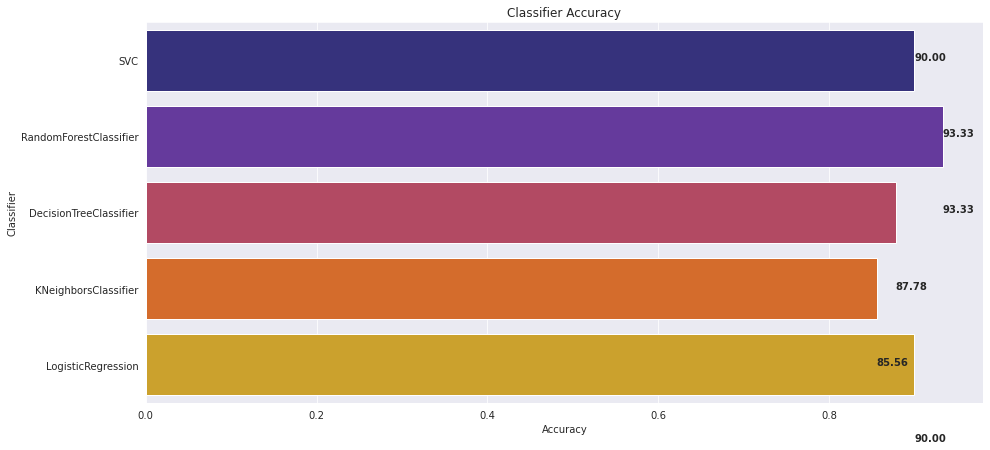

In [213]:
f,ax = plt.subplots(figsize = (15,7))
sns.barplot(x=accuracy,y=algorithm)
for i, v in enumerate(accuracy):
    ax.text(v, i, str("{:.2f}".format(100*v)), fontweight='bold')
plt.xlabel("Accuracy")
plt.ylabel("Classifier")
plt.title('Classifier Accuracy')
plt.show()